In [123]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [124]:
YellowTaxiJanuary = pd.read_parquet('./yellow_tripdata_2022-01.parquet')
YellowTaxiFebruary = pd.read_parquet('./yellow_tripdata_2022-02.parquet')

In [125]:
YellowTaxiJanuary.head

<bound method NDFrame.head of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2463926         2  2022-01-31 23:36:53   2022-01-31 23:42:51              NaN   
2463927         2  2022-01-31 23:44:22   2022-01-31 23:55:01              NaN   
2463928         2  2022-01-31 23:39:00   2022-01-31 23:50:00              NaN   
2463929         2  2022-01-31 23:36:42   2022-01-31 23:48:45              NaN   
2463930         2  2022-01-31 23:46:00   2022-02-01 00:13:00              NaN  

In [126]:
YellowTaxiFebruary.head

<bound method NDFrame.head of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-02-01 00:06:58   2022-02-01 00:19:24              1.0   
1               1  2022-02-01 00:38:22   2022-02-01 00:55:55              1.0   
2               1  2022-02-01 00:03:20   2022-02-01 00:26:59              1.0   
3               2  2022-02-01 00:08:00   2022-02-01 00:28:05              1.0   
4               2  2022-02-01 00:06:48   2022-02-01 00:33:07              1.0   
...           ...                  ...                   ...              ...   
2979426         2  2022-02-28 23:50:00   2022-03-01 00:06:00              NaN   
2979427         2  2022-02-28 23:06:57   2022-02-28 23:19:12              NaN   
2979428         2  2022-02-28 23:48:13   2022-03-01 00:03:33              NaN   
2979429         2  2022-02-28 23:56:41   2022-03-01 00:04:57              NaN   
2979430         2  2022-02-28 23:04:00   2022-02-28 23:10:00              NaN  

In [127]:
print("Number of columns in January:", YellowTaxiJanuary.shape[1])

Number of columns in January: 19


In [128]:
# Convert pickup and dropoff time columns to datetime format
YellowTaxiJanuary["tpep_pickup_datetime"] = pd.to_datetime(YellowTaxiJanuary["tpep_pickup_datetime"])
YellowTaxiJanuary["tpep_dropoff_datetime"] = pd.to_datetime(YellowTaxiJanuary["tpep_dropoff_datetime"])

# Compute the duration variable in minutes
YellowTaxiJanuary["duration"] = (YellowTaxiJanuary["tpep_dropoff_datetime"] - YellowTaxiJanuary["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Compute the standard deviation of the duration variable
YellowTaxiJanuaryDuration_std = YellowTaxiJanuary["duration"].std()

print("Standard deviation of trip duration in January:", YellowTaxiJanuaryDuration_std)

Standard deviation of trip duration in January: 46.44530513776499


Records before removing outliers: 2463931 
Records after removing outliers: 2421440

Fraction of records left after dropping outliers: 0.9827547930522406


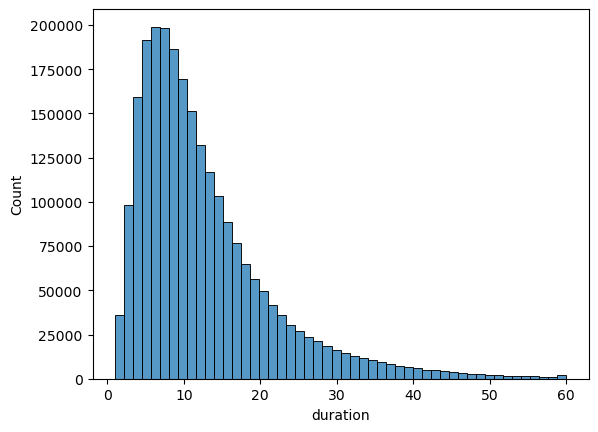

In [129]:
# Compute the number of records before and after dropping the outliers
num_records_before = len(YellowTaxiJanuary)
num_records_after = len(YellowTaxiJanuary[(YellowTaxiJanuary["duration"] >= 1) & (YellowTaxiJanuary["duration"] <= 60)])
print("Records before removing outliers:", num_records_before, "\nRecords after removing outliers:", num_records_after)
# Compute the fraction of records left after dropping the outliers
fraction_left = num_records_after / num_records_before
print("\nFraction of records left after dropping outliers:", fraction_left)

# Remove outliers
YellowTaxiJanuaryNonOutliers = YellowTaxiJanuary[(YellowTaxiJanuary["duration"] >= 1) & (YellowTaxiJanuary["duration"] <= 60)]
# Check the distribution of the duration variable
sns.histplot(YellowTaxiJanuaryNonOutliers["duration"], bins=50)
plt.show()

In [149]:
# Select the pickup and dropoff location ID columns
YellowTaxiJanuaryPickDrop = YellowTaxiJanuary[["PULocationID", "DOLocationID"]]

# Convert the dataframe to a list of dictionaries
dict_list = YellowTaxiJanuaryPickDrop.to_dict(orient="records")

# Fit a dictionary vectorizer
dv = DictVectorizer(sparse=False)
dv.fit(dict_list)

# Get a feature matrix from the vectorizer
X = dv.transform(dict_list)

In [139]:
num_columns = X.shape[1]
print("Number of columns in feature matrix:", num_columns)

Number of columns in feature matrix: 2


In [150]:
# Select the target variable
y_train = YellowTaxiJanuary["duration"]

# Train a linear regression model
model = LinearRegression()
model.fit(X, y_train)

# Predict the target variable on the training data
y_pred = model.predict(X)

#Calculate the RMSE of the model on the training data
mse = mean_squared_error(y_train, y_pred, squared=False)

print("RMSE of the linear regression model on the training data:", mse)

RMSE of the linear regression model on the training data: 46.42314493428529


In [147]:
# Convert pickup and dropoff time columns to datetime format
YellowTaxiFebruary["tpep_pickup_datetime"] = pd.to_datetime(YellowTaxiFebruary["tpep_pickup_datetime"])
YellowTaxiFebruary["tpep_dropoff_datetime"] = pd.to_datetime(YellowTaxiFebruary["tpep_dropoff_datetime"])

# Compute the duration variable in minutes
YellowTaxiFebruary["duration"] = (YellowTaxiFebruary["tpep_dropoff_datetime"] - YellowTaxiFebruary["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Remove outliers
YellowTaxiFebruaryNonOutliers = YellowTaxiFebruary[(YellowTaxiJanuary["duration"] >= 1) & (YellowTaxiFebruary["duration"] <= 60)]

# Select the pickup and dropoff location ID columns
df_val = YellowTaxiFebruary[["PULocationID", "DOLocationID"]]

# Convert the dataframe to a list of dictionaries
dict_list_val = df_val.to_dict(orient="records")

# Get a feature matrix from the vectorizer
X_val = dv.transform(dict_list_val)



In [148]:
# Select the target variable
y_val = YellowTaxiFebruary["duration"]

# Predict the target variable on the validation data
y_pred_val = model.predict(X_val)

# Calculate the RMSE of the model on the validation data
mse = mean_squared_error(y_val, y_pred_val, squared=False)

print("RMSE of the linear regression model on the validation data:", mse)

RMSE of the linear regression model on the validation data: 9.593798203918531
